<a href="https://colab.research.google.com/github/rohankeenoy/AnimalAidMission/blob/analysis/animalAidAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import plotly as plt
import plotly.graph_objs as go
import numpy as np
import pandas as pd

In [61]:
usda = pd.read_csv('All Dealers.csv')
benji = pd.read_csv("Missouri.csv")
usDF = pd.DataFrame(usda)
benjiDF = pd.DataFrame(benji)
print("Head of usda all Data")
print(usDF.head())
print("----------------------\n Head of benji Data")
print(benjiDF.head())

Head of usda all Data
  First Name    Last Name                  Kennel Name        City     State  \
0      Elisa     Brandvik                          NaN       Ozark  Arkansas   
1      Frank       Foster                          NaN  Hindsville  Arkansas   
2    Shaqwan       Hagans      Good Life Luxury Kennel   Covington   Georgia   
3    Stephen     Thurmond        Little Heart’s Kennel       Comer   Georgia   
4      Donna  Vanderzwaag  Byron Christian Academy LLC       Byron   Georgia   

       USDA License #    State License #  \
0           71-A-1423                NaN   
1  71-A-1408 (Former)                NaN   
2                 NaN      36118802 (ID)   
3                 NaN            3700107   
4                 NaN  36104424 (Former)   

                              All Inspection Reports  \
0  PST_Inspection_Report_Elisa Brandvik (10).pdf ...   
1  PST_Teachable_Moments_FRANK FOSTER_06242022 (1...   
2  GoodLifeLuxuryKennel7.27.2022.pdf (https://v5....   
3  Littl

In [62]:
#Filter for only missouri, some data cleaning
missouriBenjiData = benjiDF[benjiDF["State"] == "Missouri"]
print("List of counties in Benji:\n", missouriBenjiData["County"])
print(missouriBenjiData["State"])
print("Before NA transform")
print(missouriBenjiData.head())
missouriBenjiData = benjiDF.fillna(0)
missouriBenjiData.head()


List of counties in Benji:
 0            Clark
1       St Charles
2            Barry
3              NaN
4             Knox
           ...    
1475      Lawrence
1476         Barry
1477        Wright
1478        Newton
1479        Jasper
Name: County, Length: 1480, dtype: object
0       Missouri
1       Missouri
2       Missouri
3       Missouri
4       Missouri
          ...   
1475    Missouri
1476    Missouri
1477    Missouri
1478    Missouri
1479    Missouri
Name: State, Length: 1480, dtype: object
Before NA transform
                                  Name                    Kennel Name  \
0  Nathan Schreiber\nJuanita Schreiber  Circle S, Puppies and Paints,   
1                         Campbell Bee                            NaN   
2                           Bob Hughes      Southwest Auction Service   
3                Henry A. Grosenbacher                            NaN   
4                       Michael Franke             North River Kennel   

            Address        City   

,Name,Kennel Name,Address,City,County,State,Adult Count,Offspring Count,License Type,Current USDA,...,Pet Store (from Field 23),State (from Field 23),Status (from Field 23),Pet Store Connections 2023,Pet Store (from Pet Store Connections 2023),State (from Pet Store Connections 2023),Online Brokers,Status (from Pet Store Connections 2023),Field 43,Additional Information
0,Nathan Schreiber\nJuanita Schreiber,"Circle S, Puppies and Paints,",0,Revere,Clark,Missouri,0,0,?,0,...,0,0,0,0,0,0,0,0,0.0,0
1,Campbell Bee,0,3262 Meeker St,St Charles,St Charles,Missouri,0,0,animals confiscated,0,...,0,0,0,0,0,0,0,0,0.0,0
2,Bob Hughes,Southwest Auction Service,"Po Box 534,",Wheaton,Barry,Missouri,219,142,Auction House,43-B-0386,...,0,0,0,0,0,0,0,0,0.0,0
3,Henry A. Grosenbacher,0,PO Box 616,Cabool,0,Missouri,0,0,Auction House,43-B-3473,...,0,0,0,0,0,0,0,0,0.0,0
4,Michael Franke,North River Kennel,65723 St Hwy 151,Novelty,Knox,Missouri,105,90,Breeder,0,...,0,0,0,0,0,0,0,0,0.0,0


In [63]:
#geocode and get coordinates for county and state for the purpose of visualization
#!pip install geopy
from geopy.geocoders import Nominatim
from time import sleep
geolocator = Nominatim(user_agent="animalAidAnalysis")
#test the geolocator with the second row (row 1)
testGeocode = missouriBenjiData.iloc[1]
testGeoAddress = testGeocode["Address"]
testGeoCity = testGeocode["City"]
testGeoCounty = testGeocode["County"]
testGeoState = testGeocode["State"]

#sleeo is necessary due to how the api works
geoCordinatesTest = geolocator.geocode(testGeoAddress + ", " + testGeoCity + ", " + testGeoCounty + ", " + testGeoState)
print(f"Test geocoding for : {testGeoAddress}, {testGeoCity}, {testGeoCounty} {testGeoState}")
print(f"Coordinates: {geoCordinatesTest.latitude}, {geoCordinatesTest.longitude}")

location = f'{geoCordinatesTest.latitude},{geoCordinatesTest.longitude}'
reversedTest = geolocator.reverse(location)
address = reversedTest.raw["address"]
city = address["city"]
county = address["county"]
state = address["state"]

print(f"City: {city}")
print(f"County: {county}")
print(f"State: {state}")


Test geocoding for : 3262 Meeker St, St Charles, St Charles Missouri
Coordinates: 38.83737075887174, -90.5051742969412
City: Saint Charles
County: Saint Charles County
State: Missouri


In [77]:
import requests
from time import sleep
def getCoords(row, api_key):
    rowAddress = str(row["Address"])
    rowCity = str(row["City"])
    rowCounty = str(row["County"])
    rowState = str(row["State"])
    if address != 0:
      url = f'https://us1.locationiq.com/v1/search.php?key={api_key}&q={rowAddress}, {rowCity}, {rowCounty}, {rowState}&format=json'
    else:
      url = f'https://us1.locationiq.com/v1/search.php?key={api_key}&q={rowCity}, {rowCounty}, {rowState}&format=json'
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data:
                return {
                    'latitude': float(data[0]['lat']),
                    'longitude': float(data[0]['lon'])
                }
            else:
                return None
        else:
            print(f'Error: {response.status_code}')
            return None
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None


api_key = 'pput yours here'

missouriBenjiData["Latitude"] = pd.NA
missouriBenjiData["Longitude"] = pd.NA

for i, row in missouriBenjiData.iterrows():
    coordinates = getCoords(row, api_key)
    if coordinates:
        missouriBenjiData.at[i, "Latitude"] = coordinates['latitude']
        missouriBenjiData.at[i, "Longitude"] = coordinates['longitude']
        print(f'Geocoding successful for row {i}: {row["Address"]}, {row["City"]}, {row["County"]}, {row["State"]}')
    else:
        print(f'Geocoding failed for row {i}: {row["Address"]}, {row["City"]}, {row["County"]}, {row["State"]}')

    sleep(1)
print(missouriBenjiData)

Geocoding successful for row 0: 0, Revere, Clark, Missouri
Geocoding successful for row 1: 3262 Meeker St, St Charles, St Charles, Missouri
Geocoding successful for row 2: Po Box 534, , Wheaton, Barry, Missouri
Geocoding successful for row 3: PO Box 616, Cabool, 0, Missouri
Geocoding successful for row 4: 65723 St Hwy 151, Novelty, Knox, Missouri
Geocoding successful for row 5: RR 1 Box 370, , Ava, Douglas , Missouri
Geocoding successful for row 6: 1662 West State Hwy H, Shell Knob, Stone, Missouri
Geocoding successful for row 7: 378 Leadmine Rd,, Tunas, Dallas , Missouri
Geocoding successful for row 8: 4311 W Hwy 86, Joplin, Jasper, Missouri
Geocoding successful for row 9: 20976 Rye Ln, Richland, Pulaski, Missouri
Geocoding successful for row 10: 100 S. Blackstone, Malta Bend, Saline , Missouri
Geocoding successful for row 11: 9801 East 20th , Mountain Grove, Texas, Missouri
Geocoding successful for row 12: 12325 County Road 6590, West Plains, Howell, Missouri
Geocoding successful for

In [112]:
print(missouriBenjiData.columns)
missouriBenjiData["Pet Stores"] = np.zeros
missouriBenjiData["Pet States"] = np.zeros
def getListOfPetStoreConcat(row):
    petStoreList = [str(row["Pet Store Connection 2022"]), str(row["Pet Store Connections 2023"])]
    petStoreStates = [row["State (from Field 23)"], row["State (from Pet Store Connections 2023)"]]
    for i in range(len(petStoreList)):
        if petStoreList[i] == 0:
          petStoreList[i] = "Unknown"
        if petStoreStates[i] == 0:
          petStoreStates[i] = "Unknown"

    return petStoreList, petStoreStates

for i in range(len(missouriBenjiData)):
    petStoreList, petStoreStates = getListOfPetStoreConcat(missouriBenjiData.iloc[i])
    print(petStoreList, petStoreStates)
    missouriBenjiData.at[i, "Pet Stores"] = petStoreList
    missouriBenjiData.at[i, "Pet States"] = petStoreStates

missouriBenjiData.head()



Index(['Name', 'Kennel Name', 'Address', 'City', 'County', 'State',
       'Adult Count', 'Offspring Count', 'License Type', 'Current USDA',
       'State License', 'ID #', 'Flagged', 'Notes', 'Violations',
       'USDA Inspectors 2024', 'USDA Inspectors 2023', 'USDA Inspectors 2022',
       'Veterinarians', 'Former USDA', 'Phone #', 'Website',
       'Horrible Hundred', 'Media', 'Dropbox Link (inspections, photos)',
       'Canine Care Certified', 'Pet Breeder Association',
       'Pet Store Connection 2022', 'Pet Store (from Field 23)',
       'State (from Field 23)', 'Status (from Field 23)',
       'Pet Store Connections 2023',
       'Pet Store (from Pet Store Connections 2023)',
       'State (from Pet Store Connections 2023)', 'Online Brokers',
       'Status (from Pet Store Connections 2023)', 'Field 43',
       'Additional Information', 'Latitude', 'Longitude', 'All Stores',
       'Pet States'],
      dtype='object')
['0', '0'] ['Unknown', 'Unknown']
['0', '0'] ['Unknown', 'U

,Name,Kennel Name,Address,City,County,State,Adult Count,Offspring Count,License Type,Current USDA,...,State (from Pet Store Connections 2023),Online Brokers,Status (from Pet Store Connections 2023),Field 43,Additional Information,Latitude,Longitude,All Stores,Pet States,Pet Stores
0,Nathan Schreiber\nJuanita Schreiber,"Circle S, Puppies and Paints,",0,Revere,Clark,Missouri,0,0,?,0,...,0,0,0,0.0,0,40.49504,-91.677663,"[0, 0]","[Unknown, Unknown]","[0, 0]"
1,Campbell Bee,0,3262 Meeker St,St Charles,St Charles,Missouri,0,0,animals confiscated,0,...,0,0,0,0.0,0,38.837591,-90.505249,"[0, 0]","[Unknown, Unknown]","[0, 0]"
2,Bob Hughes,Southwest Auction Service,"Po Box 534,",Wheaton,Barry,Missouri,219,142,Auction House,43-B-0386,...,0,0,0,0.0,0,36.787732,-94.044026,"[0, 0]","[Unknown, Unknown]","[0, 0]"
3,Henry A. Grosenbacher,0,PO Box 616,Cabool,0,Missouri,0,0,Auction House,43-B-3473,...,0,0,0,0.0,0,37.126311,-92.103314,"[0, 0]","[Unknown, Unknown]","[0, 0]"
4,Michael Franke,North River Kennel,65723 St Hwy 151,Novelty,Knox,Missouri,105,90,Breeder,0,...,0,0,0,0.0,0,40.012455,-92.207572,"[0, 0]","[Unknown, Unknown]","[0, 0]"


In [114]:
#"missouriBenjiData.to_csv("geoCodedBenjiData.csv")
missouriBenjiData.columns

Index(['Name', 'Kennel Name', 'Address', 'City', 'County', 'State',
       'Adult Count', 'Offspring Count', 'License Type', 'Current USDA',
       'State License', 'ID #', 'Flagged', 'Notes', 'Violations',
       'USDA Inspectors 2024', 'USDA Inspectors 2023', 'USDA Inspectors 2022',
       'Veterinarians', 'Former USDA', 'Phone #', 'Website',
       'Horrible Hundred', 'Media', 'Dropbox Link (inspections, photos)',
       'Canine Care Certified', 'Pet Breeder Association',
       'Pet Store Connection 2022', 'Pet Store (from Field 23)',
       'State (from Field 23)', 'Status (from Field 23)',
       'Pet Store Connections 2023',
       'Pet Store (from Pet Store Connections 2023)',
       'State (from Pet Store Connections 2023)', 'Online Brokers',
       'Status (from Pet Store Connections 2023)', 'Field 43',
       'Additional Information', 'Latitude', 'Longitude', 'All Stores',
       'Pet States', 'Pet Stores'],
      dtype='object')

In [116]:
import plotly.express as px

fig = px.scatter_mapbox(missouriBenjiData, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Kennel Name","Horrible Hundred","State License","Adult Count","Offspring Count","Flagged","Violations","Pet Stores","Pet States","Online Brokers","Pet Breeder Association"],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

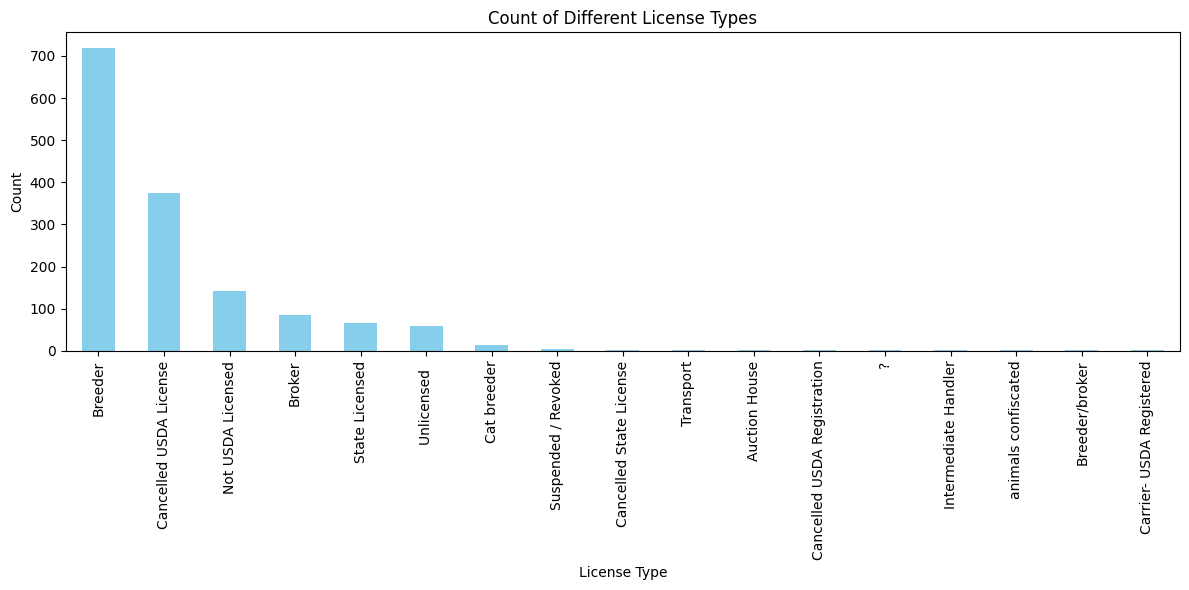

In [129]:
#How many of all licenses?
import matplotlib.pyplot as plt

license_counts = missouriBenjiData['License Type'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
license_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Different License Types')
plt.xlabel('License Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [134]:
import pandas as pd

# Example data (replace with your actual data loading)
# Assuming missouriBenjiData is your DataFrame

# Convert columns to numeric (if not already numeric)
missouriBenjiData['Adult Count'] = pd.to_numeric(missouriBenjiData['Adult Count'], errors='coerce')
missouriBenjiData['Offspring Count'] = pd.to_numeric(missouriBenjiData['Offspring Count'], errors='coerce')

# Group by 'License Type' and sum 'Adult Count' and 'Offspring Count'
sum_counts_by_license = missouriBenjiData.groupby('License Type')[['Adult Count', 'Offspring Count']].sum()

print(sum_counts_by_license)


                             Adult Count  Offspring Count
License Type                                             
?                                    0.0              0.0
Auction House                      219.0            142.0
Breeder                          32410.0          17977.0
Breeder/broker                       0.0              0.0
Broker                            2762.0           1662.0
Cancelled State License              0.0              0.0
Cancelled USDA License            7360.0           3678.0
Cancelled USDA Registration          0.0              0.0
Carrier- USDA Registered             0.0            157.0
Cat breeder                        420.0            249.0
Intermediate Handler                 0.0              0.0
Not USDA Licensed                    0.0              0.0
State Licensed                    2364.0           1149.0
Suspended / Revoked                 56.0             22.0
Transport                            0.0            132.0
Unlicensed    

In [ ]:
#Where to pets end up with current licenses

In [ ]:
#How many pets are involved in puppy mills?

In [ ]:
#how many pets came from revoked licenses